SCENARIO 1:
Predict ocean water temperature using environmental and depth-related features.
Dataset (Kaggle – Public):


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

print("VETTRISELVAN - 24BAD127")

uploaded = files.upload()

df = pd.read_csv("bottle.csv", low_memory=False)


VETTRISELVAN - 24BAD127


Saving bottle.csv to bottle.csv


MSE: 2.743861793130302
RMSE: 1.6564606222697544
R2 Score: 0.8453206431071942


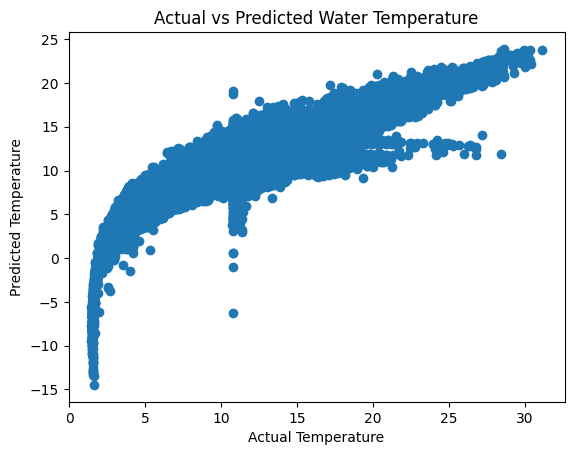

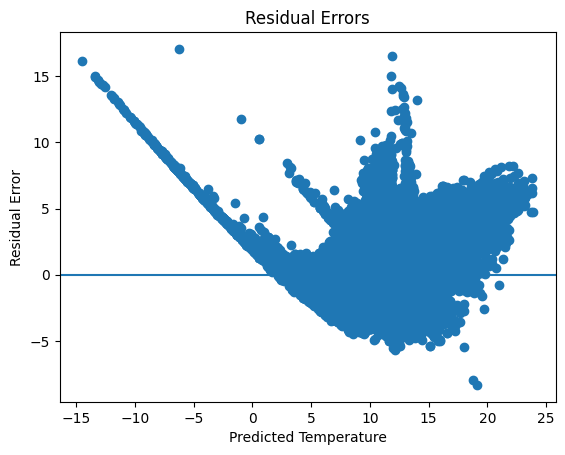

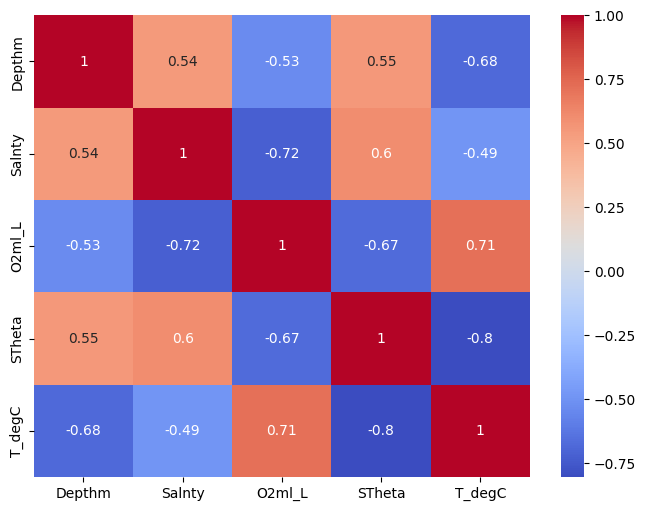

Ridge R2: 0.8453204299186163
Lasso R2: 0.8445822812209466


In [12]:


features = ["Depthm", "Salnty", "O2ml_L", "STheta"]
target = "T_degC"

data = df[features + [target]]
data = data.fillna(data.mean())

X = data[features]
y = data[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Water Temperature")
plt.show()

residuals = y_test - y_pred

plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(y=0)
plt.xlabel("Predicted Temperature")
plt.ylabel("Residual Error")
plt.title("Residual Errors")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.show()

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print("Ridge R2:", r2_score(y_test, ridge_pred))

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
print("Lasso R2:", r2_score(y_test, lasso_pred))


SCENARIO 2:
Classify whether LIC stock price will increase (1) or decrease (0) based on historical data.


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

print("VETTRISELVAN - 24BAD127")

uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])

VETTRISELVAN - 24BAD127


Saving LICI - 10 minute data.csv to LICI - 10 minute data.csv


Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')
Accuracy: 0.6132971506105834
Precision: 1.0
Recall: 0.030612244897959183
F1 Score: 0.0594059405940594


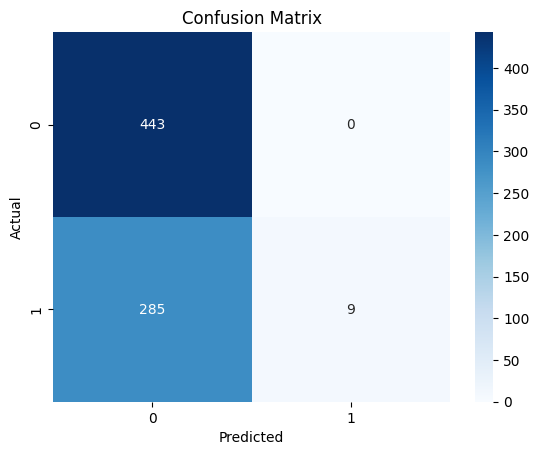

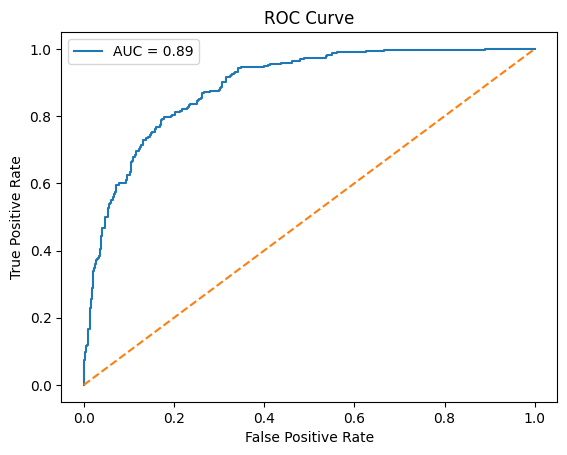

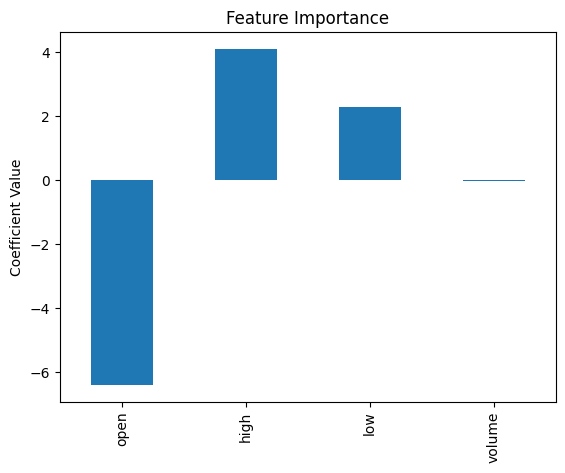

Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Optimized Accuracy: 0.7164179104477612


In [15]:


df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

print(df.columns)

df["price_movement"] = np.where(df["close"] > df["open"], 1, 0)

features = ["open", "high", "low", "volume"]
target = "price_movement"

data = df[features + [target]]
data = data.fillna(data.mean())

X = data[features]
y = data[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

importance = pd.Series(model.coef_[0], index=features)

plt.figure()
importance.plot(kind="bar")
plt.title("Feature Importance")
plt.ylabel("Coefficient Value")
plt.show()

param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l2"],
    "solver": ["lbfgs"]
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_pred = best_model.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("Optimized Accuracy:", accuracy_score(y_test, best_pred))
